In [2]:
import ebooklib
from ebooklib import epub
from bs4 import BeautifulSoup

def extract_text_from_epub(epub_path):
    book = epub.read_epub(epub_path)
    text_content = []

    for item in book.get_items_of_type(ebooklib.ITEM_DOCUMENT):
        soup = BeautifulSoup(item.get_body_content(), 'html.parser')
        text_content.append(soup.get_text())

    return text_content

def save_text_to_file(text_content, output_file):
    with open(output_file, 'w', encoding='utf-8') as file:
        for text_chunk in text_content:
            file.write(text_chunk + '\n\n')

if __name__ == "__main__":
    # Provide the path to your EPUB file
    epub_path = 'HP1.epub'

    # Extract text content
    text_content = extract_text_from_epub(epub_path)

    # Save text content to a text file
    output_file = 'output.txt'
    save_text_to_file(text_content, output_file)

    print(f'Text extracted from EPUB file and saved to {output_file}')


C:\Users\unikw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ebooklib\epub.py:1395: UserWarning: In the future version we will turn default option ignore_ncx to True.
  warnings.warn('In the future version we will turn default option ignore_ncx to True.')


Text extracted from EPUB file and saved to output.txt


In [6]:
import re

def word_frequency(text):
    # Create a dictionary to store word counts
    word_counts = {}

    # Split the text into individual words
    words = re.split(r"\W+", text)

    # Iterate over the words and update the dictionary (ignoring case)
    for word in words:
        word = word.lower()
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    # Sort the dictionary by the word counts in descending order
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    # Return the sorted word frequencies
    return sorted_word_counts

def save_frequency_chart(sorted_word_counts, output_file):
    with open(output_file, 'w', encoding='utf-8') as file:
        for word, count in sorted_word_counts:
            file.write(f"{word}: {count}\n")

if __name__ == "__main__":
    # Specify the path to the output file
    output_file_path = 'frequency_chart.txt'

    # Read the content of the output file
    with open('output.txt', 'r', encoding='utf-8') as file:
        content = file.read()

    # Calculate word frequencies
    sorted_word_counts = word_frequency(content)

    # Save the frequency chart to a text file
    save_frequency_chart(sorted_word_counts, output_file_path)

    print(f'Frequency chart saved to {output_file_path}')


Frequency chart saved to frequency_chart.txt


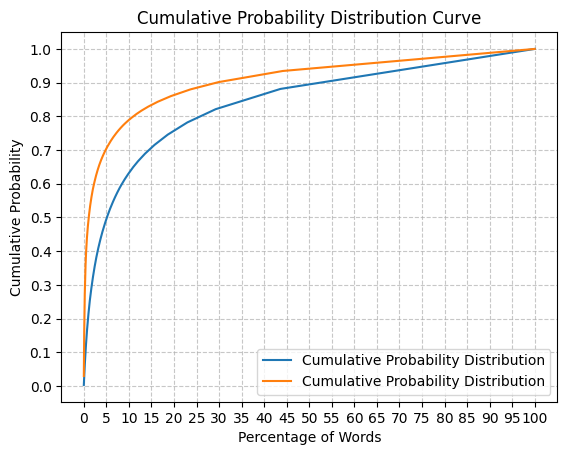

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def cumulative_probability(sorted_word_counts, x, y):
    # Filter words within the frequency range (x and y)
    filtered_word_counts = [(word, count) for word, count in sorted_word_counts if x <= count <= y]

    total_words = sum(count for _, count in filtered_word_counts)
    cumulative_prob = np.cumsum([count / total_words for _, count in filtered_word_counts])
    return cumulative_prob

def plot_cumulative_distribution(cumulative_prob):
    # Number of words for the x-axis (0 to 100)
    x_values = np.linspace(0, 100, len(cumulative_prob))

    # Plot the cumulative distribution curve
    plt.plot(x_values, cumulative_prob, label='Cumulative Probability Distribution')
    plt.xlabel('Percentage of Words')
    plt.ylabel('Cumulative Probability')
    plt.title('Cumulative Probability Distribution Curve')
    plt.legend()
        # Add grid lines at every 5%
    plt.xticks(np.arange(0, 101, 5))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.grid(True, linestyle='--', alpha=0.7)
    # plt.grid(True)
    #plt.show()

if __name__ == "__main__":
    # Read the content of the output file
    with open('output.txt', 'r', encoding='utf-8') as file:
        content = file.read()

    # Calculate word frequencies
    sorted_word_counts = word_frequency(content)

    # Calculate cumulative probability
    cumulative_prob1 = cumulative_probability(sorted_word_counts,0,10000)

    # Plot the cumulative
    #plot_cumulative_distribution(cumulative_prob)
    
    # Set the frequency range (modify as needed)
    x_freq, y_freq = 0,150  # Example: Include words with frequency between 5 and 15

    # Calculate cumulative probability for the specified frequency range
    cumulative_prob = cumulative_probability(sorted_word_counts, x_freq, y_freq)

    # Plot the cumulative distribution curve for the specified frequency range
    plot_cumulative_distribution(cumulative_prob) 
    plot_cumulative_distribution(cumulative_prob1) 
    plt.show()

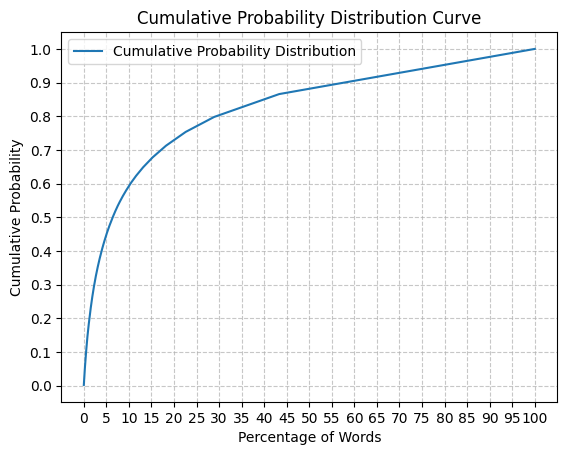

In [19]:
plot_cumulative_distribution(cumulative_prob)